In [1]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
from scipy.stats.mstats import gmean

# 가중치 계산

In [2]:
# 쌍대비교행렬
np01 = np.array([[1, 1, 1, 1/2, 1/2, 1/2, 1/2, 1/3, 1/3, 1/3],
                 [1, 1, 1, 1/2, 1/2, 1/2, 1/2, 1/3, 1/3, 1/3],
                 [1, 1, 1, 1/2, 1/2, 1/2, 1/2, 1/3, 1/3, 1/3],
                 [2, 2, 2, 1, 1, 1, 1, 1/2, 1/2, 1/2],
                 [2, 2, 2, 1, 1, 1, 1, 1/2, 1/2, 1/2],
                 [2, 2, 2, 1, 1, 1, 1, 1/2, 1/2, 1/2],
                 [2, 2, 2, 1, 1, 1, 1, 1/2, 1/2, 1/2],
                 [3, 3, 3, 2, 2, 2, 2, 1, 1, 1],
                 [3, 3, 3, 2, 2, 2, 2, 1, 1, 1],
                 [3, 3, 3, 2, 2, 2, 2, 1, 1, 1]])

In [3]:
print(np01)

[[1.         1.         1.         0.5        0.5        0.5
  0.5        0.33333333 0.33333333 0.33333333]
 [1.         1.         1.         0.5        0.5        0.5
  0.5        0.33333333 0.33333333 0.33333333]
 [1.         1.         1.         0.5        0.5        0.5
  0.5        0.33333333 0.33333333 0.33333333]
 [2.         2.         2.         1.         1.         1.
  1.         0.5        0.5        0.5       ]
 [2.         2.         2.         1.         1.         1.
  1.         0.5        0.5        0.5       ]
 [2.         2.         2.         1.         1.         1.
  1.         0.5        0.5        0.5       ]
 [2.         2.         2.         1.         1.         1.
  1.         0.5        0.5        0.5       ]
 [3.         3.         3.         2.         2.         2.
  2.         1.         1.         1.        ]
 [3.         3.         3.         2.         2.         2.
  2.         1.         1.         1.        ]
 [3.         3.         3.        

In [4]:
np02 = np.dot(np01, np01)

In [5]:
print(np02)

[[10.  10.  10.   5.5  5.5  5.5  5.5  3.   3.   3. ]
 [10.  10.  10.   5.5  5.5  5.5  5.5  3.   3.   3. ]
 [10.  10.  10.   5.5  5.5  5.5  5.5  3.   3.   3. ]
 [18.5 18.5 18.5 10.  10.  10.  10.   5.5  5.5  5.5]
 [18.5 18.5 18.5 10.  10.  10.  10.   5.5  5.5  5.5]
 [18.5 18.5 18.5 10.  10.  10.  10.   5.5  5.5  5.5]
 [18.5 18.5 18.5 10.  10.  10.  10.   5.5  5.5  5.5]
 [34.  34.  34.  18.5 18.5 18.5 18.5 10.  10.  10. ]
 [34.  34.  34.  18.5 18.5 18.5 18.5 10.  10.  10. ]
 [34.  34.  34.  18.5 18.5 18.5 18.5 10.  10.  10. ]]


In [6]:
np03 = np02.sum(axis=0)

In [7]:
print(np03)

[206. 206. 206. 112. 112. 112. 112.  61.  61.  61.]


In [8]:
np04 = np03/np03.sum()

### 가중치 계산 결과 

In [9]:
print(np04)

[0.16493195 0.16493195 0.16493195 0.08967174 0.08967174 0.08967174
 0.08967174 0.04883907 0.04883907 0.04883907]


In [10]:
# 차례대로 생활인구, 불법주정차 건수, 주차장면수, 
# 외식업 점포수, 소매업 점포수, 서비스업 점포수, 차량등록대수
# 세대수, 자치구 면적, 총인구수

# 주차수요 계산

### 데이터 전처리

In [11]:
# 데이터 불러오기
EA = pd.read_csv("C:/Users/Admin/OneDrive/바탕 화면/drive-download-20230425T035520Z-001/중구_외식점포수.csv", encoding = 'cp949')
SE = pd.read_csv("C:/Users/Admin/OneDrive/바탕 화면/drive-download-20230425T035520Z-001/중구_소매업점포수.csv", encoding = 'cp949')
SV = pd.read_csv("C:/Users/Admin/OneDrive/바탕 화면/drive-download-20230425T035520Z-001/중구_서비스업점포수.csv", encoding = 'cp949')
CA = pd.read_csv("C:/Users/Admin/OneDrive/바탕 화면/drive-download-20230425T035520Z-001/중구_자동차등록대수.csv", encoding = 'cp949')
GE = pd.read_csv("C:/Users/Admin/OneDrive/바탕 화면/drive-download-20230425T035520Z-001/중구_세대수.csv", encoding = 'cp949')
AR = pd.read_csv("C:/Users/Admin/OneDrive/바탕 화면/drive-download-20230425T035520Z-001/중구_동별면적수.csv", encoding = 'cp949')
PO = pd.read_csv("C:/Users/Admin/OneDrive/바탕 화면/drive-download-20230425T035520Z-001/중구_주민등록인구수.csv", encoding = 'cp949')

In [12]:
df = pd.concat([EA, SE, SV, CA, GE, AR, PO], axis=1)
df

,동이름,외식점포수,동이름,소매업점포수,동이름,서비스업점포수,읍면동,합계,행정구역,2022년12월_전체세대,행정구역,면적(㎢),행정구역,인구수
0,소공동,837,소공동,913,소공동,838,중구 소공동,3421,서울특별시 중구 소공동(1114052000),1286,소공동,0.95,소공동,2228
1,회현동,657,회현동,4350,회현동,305,중구 회현동,10710,서울특별시 중구 회현동(1114054000),2561,회현동,0.84,회현동,4506
2,명동,1458,명동,1990,명동,1432,중구 명동,7195,서울특별시 중구 명동(1114055000),1457,명동,0.99,명동,2728
3,필동,493,필동,384,필동,299,중구 필동,2125,서울특별시 중구 필동(1114057000),2431,필동,1.14,필동,3938
4,장충동,148,장충동,224,장충동,102,중구 장충동,1297,서울특별시 중구 장충동(1114058000),2829,장충동,1.36,장충동,4577
5,광희동,766,광희동,4557,광희동,520,중구 광희동,2570,서울특별시 중구 광희동(1114059000),3424,광희동,0.74,광희동,5429
6,을지로동,731,을지로동,1816,을지로동,441,중구 을지로동,1596,서울특별시 중구 을지로동(1114060500),1297,을지로동,0.60,을지로동,1674
7,신당동,361,신당동,7445,신당동,302,중구 신당동,3513,서울특별시 중구 신당동(1114061500),4808,신당동,0.55,신당동,7607
8,다산동,239,다산동,464,다산동,218,중구 다산동,3398,서울특별시 중구 다산동(1114062500),6821,다산동,0.51,다산동,13486
9,약수동,145,약수동,248,약수동,246,중구 약수동,4748,서울특별시 중구 약수동(1114063500),7779,약수동,0.48,약수동,16347


In [13]:
df1= df.sort_values(by='읍면동')

In [14]:
df1 = df1.reset_index(drop=True)
df1

,동이름,외식점포수,동이름,소매업점포수,동이름,서비스업점포수,읍면동,합계,행정구역,2022년12월_전체세대,행정구역,면적(㎢),행정구역,인구수
0,광희동,766,광희동,4557,광희동,520,중구 광희동,2570,서울특별시 중구 광희동(1114059000),3424,광희동,0.74,광희동,5429
1,다산동,239,다산동,464,다산동,218,중구 다산동,3398,서울특별시 중구 다산동(1114062500),6821,다산동,0.51,다산동,13486
2,동화동,130,동화동,336,동화동,175,중구 동화동,2949,서울특별시 중구 동화동(1114066500),3989,동화동,0.26,동화동,10033
3,명동,1458,명동,1990,명동,1432,중구 명동,7195,서울특별시 중구 명동(1114055000),1457,명동,0.99,명동,2728
4,소공동,837,소공동,913,소공동,838,중구 소공동,3421,서울특별시 중구 소공동(1114052000),1286,소공동,0.95,소공동,2228
5,신당5동,267,신당5동,347,신당5동,189,중구 신당5동,2932,서울특별시 중구 신당제5동(1114065000),5334,신당5동,0.39,신당5동,10127
6,신당동,361,신당동,7445,신당동,302,중구 신당동,3513,서울특별시 중구 신당동(1114061500),4808,신당동,0.55,신당동,7607
7,약수동,145,약수동,248,약수동,246,중구 약수동,4748,서울특별시 중구 약수동(1114063500),7779,약수동,0.48,약수동,16347
8,을지로동,731,을지로동,1816,을지로동,441,중구 을지로동,1596,서울특별시 중구 을지로동(1114060500),1297,을지로동,0.60,을지로동,1674
9,장충동,148,장충동,224,장충동,102,중구 장충동,1297,서울특별시 중구 장충동(1114058000),2829,장충동,1.36,장충동,4577


### 생활인구 계산

In [52]:
map_data = {"dong":["소공동","회현동","명동","필동","장충동","광희동","을지로동","신당동",
                         "다산동","약수동","청구동","동화동","황학동","중림동","신당5동"],
            "day":[691800000,616600000,870700000,238700000,185900000,402700000,383300000,279200000,167200000,123600000,
                   98320000,99670000,123200000,123200000,314577900],
            "night":[92720000,83720000,118100000,82170000,84360000,179500000,90470000,156580000,
                     150700000,153900000,126300000,108600000,14300000,14300000,103980000]}
Map_data = pd.DataFrame(map_data)
Map_data = Map_data.sort_values("dong")
Map_data = Map_data.reset_index(drop=True)
Map_data
# 신당5동 데이터가 결측치라 평균값으로 메꿈

,dong,day,night
0,광희동,402700000,179500000
1,다산동,167200000,150700000
2,동화동,99670000,108600000
3,명동,870700000,118100000
4,소공동,691800000,92720000
5,신당5동,314577900,103980000
6,신당동,279200000,156580000
7,약수동,123600000,153900000
8,을지로동,383300000,90470000
9,장충동,185900000,84360000


In [53]:
df2 = pd.concat([df1, Map_data], axis=1)
df2

,동이름,외식점포수,동이름,소매업점포수,동이름,서비스업점포수,읍면동,합계,행정구역,2022년12월_전체세대,행정구역,면적(㎢),행정구역,인구수,dong,day,night
0,광희동,766,광희동,4557,광희동,520,중구 광희동,2570,서울특별시 중구 광희동(1114059000),3424,광희동,0.74,광희동,5429,광희동,402700000,179500000
1,다산동,239,다산동,464,다산동,218,중구 다산동,3398,서울특별시 중구 다산동(1114062500),6821,다산동,0.51,다산동,13486,다산동,167200000,150700000
2,동화동,130,동화동,336,동화동,175,중구 동화동,2949,서울특별시 중구 동화동(1114066500),3989,동화동,0.26,동화동,10033,동화동,99670000,108600000
3,명동,1458,명동,1990,명동,1432,중구 명동,7195,서울특별시 중구 명동(1114055000),1457,명동,0.99,명동,2728,명동,870700000,118100000
4,소공동,837,소공동,913,소공동,838,중구 소공동,3421,서울특별시 중구 소공동(1114052000),1286,소공동,0.95,소공동,2228,소공동,691800000,92720000
5,신당5동,267,신당5동,347,신당5동,189,중구 신당5동,2932,서울특별시 중구 신당제5동(1114065000),5334,신당5동,0.39,신당5동,10127,신당5동,314577900,103980000
6,신당동,361,신당동,7445,신당동,302,중구 신당동,3513,서울특별시 중구 신당동(1114061500),4808,신당동,0.55,신당동,7607,신당동,279200000,156580000
7,약수동,145,약수동,248,약수동,246,중구 약수동,4748,서울특별시 중구 약수동(1114063500),7779,약수동,0.48,약수동,16347,약수동,123600000,153900000
8,을지로동,731,을지로동,1816,을지로동,441,중구 을지로동,1596,서울특별시 중구 을지로동(1114060500),1297,을지로동,0.60,을지로동,1674,을지로동,383300000,90470000
9,장충동,148,장충동,224,장충동,102,중구 장충동,1297,서울특별시 중구 장충동(1114058000),2829,장충동,1.36,장충동,4577,장충동,185900000,84360000


In [54]:
df2.columns

Index(['동이름', '외식점포수', '동이름', '소매업점포수', '동이름', '서비스업점포수', '읍면동', '합계', '행정구역',
       '2022년12월_전체세대', '행정구역', '면적(㎢)', '행정구역', '인구수', 'dong', 'day',
       'night'],
      dtype='object')

In [55]:
df2.columns = ['dong', 'eating', 'dong1', 'selling', 'dong2', 'service', 'dong3', 'car', 'dong4', 'generation',
       'dong5', 'area', 'dong6', 'population', 'dong7', 'day', 'night']

In [56]:
df2.columns

Index(['dong', 'eating', 'dong1', 'selling', 'dong2', 'service', 'dong3',
       'car', 'dong4', 'generation', 'dong5', 'area', 'dong6', 'population',
       'dong7', 'day', 'night'],
      dtype='object')

In [57]:
df3 = df2.drop(['dong1', 'dong2', 'dong3', 'dong4', 'dong5', 'dong6', 'dong7' ],axis = 1)

In [58]:
df3

,dong,eating,selling,service,car,generation,area,population,day,night
0,광희동,766,4557,520,2570,3424,0.74,5429,402700000,179500000
1,다산동,239,464,218,3398,6821,0.51,13486,167200000,150700000
2,동화동,130,336,175,2949,3989,0.26,10033,99670000,108600000
3,명동,1458,1990,1432,7195,1457,0.99,2728,870700000,118100000
4,소공동,837,913,838,3421,1286,0.95,2228,691800000,92720000
5,신당5동,267,347,189,2932,5334,0.39,10127,314577900,103980000
6,신당동,361,7445,302,3513,4808,0.55,7607,279200000,156580000
7,약수동,145,248,246,4748,7779,0.48,16347,123600000,153900000
8,을지로동,731,1816,441,1596,1297,0.60,1674,383300000,90470000
9,장충동,148,224,102,1297,2829,1.36,4577,185900000,84360000


### 주차 구획 데이터

In [59]:
parking_size = pd.DataFrame({"동명":["광희동","다산동","동화동","명동","신당5동",
                                     "신당동","약수동","을지로동","장충동","중림동",
                                     "청구동","필동","회현동","소공동","황학동"], 
                            "구획수":[32,67,27,5,39,36,2,25,67,40,61,130,8,37,13]})
parking_size = parking_size.sort_values("동명")
parking_size = parking_size.reset_index(drop=True)
parking_size
# 소공동 데이터가 결측치라 평균값으로 메꿈

,동명,구획수
0,광희동,32
1,다산동,67
2,동화동,27
3,명동,5
4,소공동,37
5,신당5동,39
6,신당동,36
7,약수동,2
8,을지로동,25
9,장충동,67


In [60]:
df4 = pd.concat([df3, parking_size], axis=1)
df4

,dong,eating,selling,service,car,generation,area,population,day,night,동명,구획수
0,광희동,766,4557,520,2570,3424,0.74,5429,402700000,179500000,광희동,32
1,다산동,239,464,218,3398,6821,0.51,13486,167200000,150700000,다산동,67
2,동화동,130,336,175,2949,3989,0.26,10033,99670000,108600000,동화동,27
3,명동,1458,1990,1432,7195,1457,0.99,2728,870700000,118100000,명동,5
4,소공동,837,913,838,3421,1286,0.95,2228,691800000,92720000,소공동,37
5,신당5동,267,347,189,2932,5334,0.39,10127,314577900,103980000,신당5동,39
6,신당동,361,7445,302,3513,4808,0.55,7607,279200000,156580000,신당동,36
7,약수동,145,248,246,4748,7779,0.48,16347,123600000,153900000,약수동,2
8,을지로동,731,1816,441,1596,1297,0.60,1674,383300000,90470000,을지로동,25
9,장충동,148,224,102,1297,2829,1.36,4577,185900000,84360000,장충동,67


In [61]:
df5 = df4.drop('동명', axis=1)

In [62]:
df5.columns

Index(['dong', 'eating', 'selling', 'service', 'car', 'generation', 'area',
       'population', 'day', 'night', '구획수'],
      dtype='object')

In [63]:
df5.columns = ['dong', 'eating', 'selling', 'service', 'car', 'generation', 'area','population', 'day', 'night', 'parking_size']

In [64]:
df6 = df5.copy()

### 데이터 처리 완료

In [71]:
df6

,dong,eating,selling,service,car,generation,area,population,day,night,parking_size
0,광희동,766,4557,520,2570,3424,0.74,5429,402700000,179500000,32
1,다산동,239,464,218,3398,6821,0.51,13486,167200000,150700000,67
2,동화동,130,336,175,2949,3989,0.26,10033,99670000,108600000,27
3,명동,1458,1990,1432,7195,1457,0.99,2728,870700000,118100000,5
4,소공동,837,913,838,3421,1286,0.95,2228,691800000,92720000,37
5,신당5동,267,347,189,2932,5334,0.39,10127,314577900,103980000,39
6,신당동,361,7445,302,3513,4808,0.55,7607,279200000,156580000,36
7,약수동,145,248,246,4748,7779,0.48,16347,123600000,153900000,2
8,을지로동,731,1816,441,1596,1297,0.60,1674,383300000,90470000,25
9,장충동,148,224,102,1297,2829,1.36,4577,185900000,84360000,67


In [66]:
# 0.16493195 0.16493195 0.16493195 0.08967174 0.08967174 0.08967174 0.08967174 0.04883907 0.04883907 0.04883907
# 차례대로 생활인구, 불법주정차 건수, 주차장면수, 
# 외식업 점포수, 소매업 점포수, 서비스업 점포수, 차량등록대수
# 세대수, 자치구 면적, 총인구수

In [67]:
df6.columns

Index(['dong', 'eating', 'selling', 'service', 'car', 'generation', 'area',
       'population', 'day', 'night', 'parking_size'],
      dtype='object')

### z-score scailing

In [72]:
df7 = df6.copy()

In [73]:
df7['eating'] = (df7['eating']-df7['eating'].mean())/np.sqrt(df7['eating'].var())
df7['selling'] = (df7['selling']-df7['selling'].mean())/np.sqrt(df7['selling'].var())
df7['service'] = (df7['service']-df7['service'].mean())/np.sqrt(df7['service'].var())
df7['car'] = (df7['car']-df7['car'].mean())/np.sqrt(df7['car'].var())
df7['generation'] = (df7['generation']-df7['generation'].mean())/np.sqrt(df7['generation'].var())
df7['area'] = (df7['area']-df7['area'].mean())/np.sqrt(df7['area'].var())
df7['population'] = (df7['population']-df7['population'].mean())/np.sqrt(df7['population'].var())
df7['day'] = (df7['day']-df7['day'].mean())/np.sqrt(df7['day'].var())
df7['night'] = (df7['night']-df7['night'].mean())/np.sqrt(df7['night'].var())
df7['parking_size'] = (df7['parking_size']-df7['parking_size'].mean())/np.sqrt(df7['parking_size'].var())

In [74]:
df7

,dong,eating,selling,service,car,generation,area,population,day,night,parking_size
0,광희동,0.827965,1.360874,0.421477,-0.535378,-0.352596,0.232249,-0.544153,3.678977e-01,1.591367,-0.222767
1,다산동,-0.581394,-0.535681,-0.451142,-0.183689,1.172707,-0.470610,1.136920,-6.152820e-01,0.984489,0.850193
2,동화동,-0.872893,-0.594992,-0.575390,-0.374400,-0.098903,-1.234586,0.416460,-8.972104e-01,0.097353,-0.376047
3,명동,2.678584,0.171414,3.056673,1.429073,-1.235809,0.996225,-1.107710,2.321733e+00,0.297538,-1.050479
4,소공동,1.017841,-0.327630,1.340328,-0.173919,-1.312590,0.873989,-1.212033,1.574850e+00,-0.237272,-0.069487
5,신당5동,-0.506513,-0.589895,-0.534937,-0.381620,0.505022,-0.837318,0.436073,1.669944e-07,0.000000,-0.008175
6,신당동,-0.255129,2.699073,-0.208427,-0.134843,0.268840,-0.348373,-0.089718,-1.476976e-01,1.108394,-0.100143
7,약수동,-0.832779,-0.635768,-0.370237,0.389719,1.602864,-0.562287,1.733861,-7.973060e-01,1.051920,-1.142447
8,을지로동,0.734364,0.090789,0.193209,-0.949081,-1.307651,-0.195578,-1.327624,2.869054e-01,-0.284684,-0.437359
9,장충동,-0.824756,-0.646889,-0.786321,-1.076080,-0.619760,2.126911,-0.721920,-5.372121e-01,-0.413435,0.850193


### 가중치 곱하기

In [33]:
df6['eating'] = df6['eating'] * 0.08967174 
df6['selling'] = df6['selling'] * 0.08967174 
df6['service'] = df6['service'] * 0.08967174 
df6['car'] = df6['car'] * 0.08967174 
df6['generation'] = df6['generation'] * 0.04883907
df6['area'] = df6['area'] * 0.04883907
df6['population'] = df6['population'] * 0.04883907
df6['day'] = df6['day'] * 0.16493195
df6['night'] = df6['night'] * 0.16493195
df6['parking_size'] = df6['parking_size'] * 0.16493195

In [34]:
df6

,dong,eating,selling,service,car,generation,area,population,day,night,parking_size
0,광희동,68.688553,408.634119,46.629305,230.456372,167.224976,0.036141,265.147311,6641.809626,2960.528502,5.277822
1,다산동,21.431546,41.607687,19.548439,304.704573,333.131296,0.024908,658.643698,2757.662204,2485.524486,11.050441
2,동화동,11.657326,30.129705,15.692554,264.441961,194.819050,0.012698,490.002389,1643.876746,1791.160977,4.453163
3,명동,130.741397,178.446763,128.409932,645.188169,71.158525,0.048351,133.232983,14360.624886,1947.846329,0.824660
4,소공동,75.055246,81.870299,75.144918,306.767023,62.807044,0.046397,108.813448,11409.992301,1529.249040,6.102482
5,신당5동,23.942355,31.116094,16.947959,262.917542,260.507599,0.019047,494.593262,5188.394647,1714.962416,6.432346
6,신당동,32.371498,667.606104,27.080865,315.016823,234.818249,0.026861,371.518805,4604.900044,2582.504473,5.937550
7,약수동,13.002402,22.238592,22.059248,425.761422,379.919126,0.023443,798.372277,2038.558902,2538.302711,0.329864
8,을지로동,65.550042,162.843880,39.545237,143.116097,63.344274,0.029303,81.756603,6321.841643,1492.139352,4.123299
9,장충동,13.271418,20.086470,9.146517,116.304247,138.165729,0.066421,223.536423,3066.084951,1391.365930,11.050441


In [35]:
df6 = df6.set_index('dong')

In [36]:
df6

,eating,selling,service,car,generation,area,population,day,night,parking_size
dong,,,,,,,,,,
광희동,68.688553,408.634119,46.629305,230.456372,167.224976,0.036141,265.147311,6641.809626,2960.528502,5.277822
다산동,21.431546,41.607687,19.548439,304.704573,333.131296,0.024908,658.643698,2757.662204,2485.524486,11.050441
동화동,11.657326,30.129705,15.692554,264.441961,194.819050,0.012698,490.002389,1643.876746,1791.160977,4.453163
명동,130.741397,178.446763,128.409932,645.188169,71.158525,0.048351,133.232983,14360.624886,1947.846329,0.824660
소공동,75.055246,81.870299,75.144918,306.767023,62.807044,0.046397,108.813448,11409.992301,1529.249040,6.102482
신당5동,23.942355,31.116094,16.947959,262.917542,260.507599,0.019047,494.593262,5188.394647,1714.962416,6.432346
신당동,32.371498,667.606104,27.080865,315.016823,234.818249,0.026861,371.518805,4604.900044,2582.504473,5.937550
약수동,13.002402,22.238592,22.059248,425.761422,379.919126,0.023443,798.372277,2038.558902,2538.302711,0.329864
을지로동,65.550042,162.843880,39.545237,143.116097,63.344274,0.029303,81.756603,6321.841643,1492.139352,4.123299


In [47]:
df6.columns

Index(['eating', 'selling', 'service', 'car', 'generation', 'area',
       'population', 'day', 'night', 'parking_size'],
      dtype='object')

### 낮밤 따로 계산

In [48]:
df_day = df6[['eating', 'selling', 'service', 'car', 'generation', 'area',
       'population', 'day', 'parking_size']]
df_night = df6[['eating', 'selling', 'service', 'car', 'generation', 'area',
       'population', 'night', 'parking_size']]

In [49]:
df_day_demand = df_day.sum(axis=1)
df_night_demand = df_night.sum(axis=1)

# 주차수급률 계산

### 동별 주차면수

In [50]:
parking_size.columns = ['dong', 'parking_size']

In [51]:
parking_size = parking_size.set_index('dong')

In [52]:
df_final = pd.concat([parking_size, df_day_demand, df_night_demand], axis=1)
df_final

,parking_size,0,1
dong,,,
광희동,32,7833.904225,4152.623101
다산동,67,4147.804792,3875.667075
동화동,27,2655.085593,2802.369824
명동,5,15648.675665,3235.897108
소공동,37,12126.599158,2245.855897
신당5동,39,6284.870851,2811.438620
신당동,36,6259.276800,4236.881229
약수동,2,3700.265275,4200.009083
을지로동,25,6882.150379,2052.448087


In [53]:
df_final['df_day_percent'] = df_final['parking_size'] / df_final[0]
df_final['df_night_percent'] = df_final['parking_size'] / df_final[1]

In [54]:
df_final.columns

Index(['parking_size', 0, 1, 'df_day_percent', 'df_night_percent'], dtype='object')

### 최종 데이터 

In [55]:
df_final.columns = ['parking_size', 'df_day_demand', 'df_night_demand', 'df_day_percent', 'df_night_percent']

In [56]:
df_final

,parking_size,df_day_demand,df_night_demand,df_day_percent,df_night_percent
dong,,,,,
광희동,32,7833.904225,4152.623101,0.004085,0.007706
다산동,67,4147.804792,3875.667075,0.016153,0.017287
동화동,27,2655.085593,2802.369824,0.010169,0.009635
명동,5,15648.675665,3235.897108,0.000320,0.001545
소공동,37,12126.599158,2245.855897,0.003051,0.016475
신당5동,39,6284.870851,2811.438620,0.006205,0.013872
신당동,36,6259.276800,4236.881229,0.005751,0.008497
약수동,2,3700.265275,4200.009083,0.000541,0.000476
을지로동,25,6882.150379,2052.448087,0.003633,0.012181


# 주차수급률 시각화

In [57]:
import matplotlib.pyplot as plt #그래프 그리기 위한 라이브러리
from matplotlib import font_manager,rc  #한글 폰트 입력을 위한 라이브러리
import folium
import json
import urllib.request

In [58]:
plt.rc('font', family = 'NanumBarunGothic') #나눔 폰트 사용

In [59]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [60]:
dong_list = ["광희동","다산동","동화동","명동","신당5동","신당동","약수동","을지로동","장충동","중림동", "청구동","필동","회현동","소공동","황학동"]

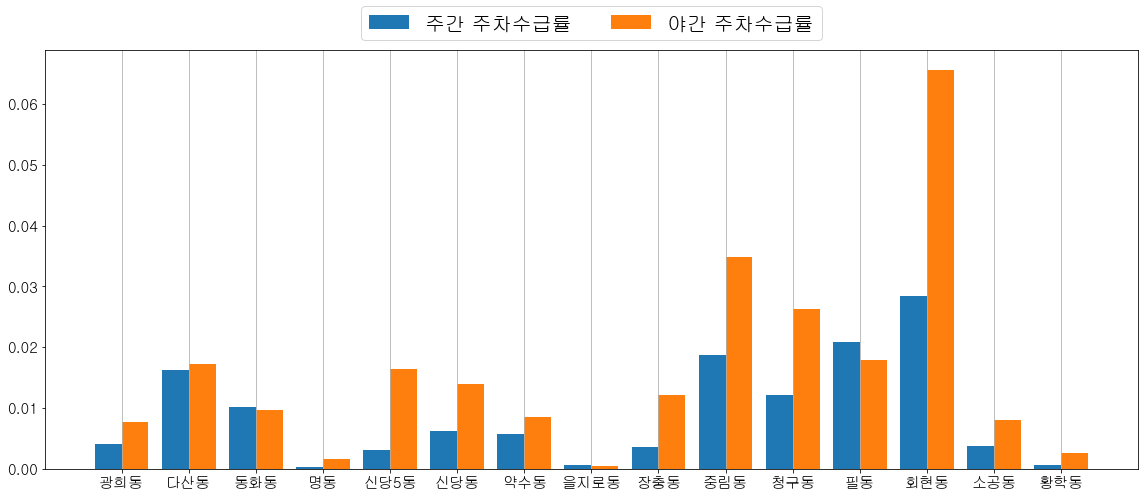

In [61]:
np.random.seed(0)
N = 2
WIDTH = 0.8
BAR_WIDTH = WIDTH/N

n_data = 15
data1 = df_final['df_day_percent']
data2 = df_final['df_night_percent']
data_idx = np.arange(n_data)

fig, ax = plt.subplots(figsize=(16, 7))
xticks = dong_list
plt.xticks(np.arange(0, 15, 1), labels=dong_list)

ax.grid(axis='x')
ax.tick_params(labelsize=15)

ax.bar(data_idx - BAR_WIDTH/2, data1, width=BAR_WIDTH, label='주간 주차수급률')
ax.bar(data_idx + BAR_WIDTH/2, data2, width=BAR_WIDTH, label='야간 주차수급률')

ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1), fontsize=20, ncol=2)
plt.tight_layout()

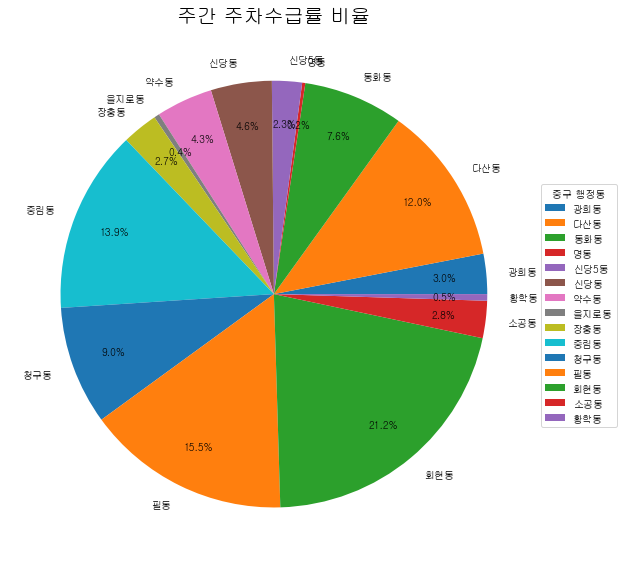

In [63]:
plt.figure(figsize = (13, 8))
plt.pie(df_final['df_day_percent']*100, labels  = dong_list, autopct = '%.1f%%', pctdistance = 0.8)
plt.title('주간 주차수급률 비율', size= 20)
plt.legend(dong_list, loc =(1, 0.25), title = '중구 행정동' )
plt.tight_layout()
plt.show()

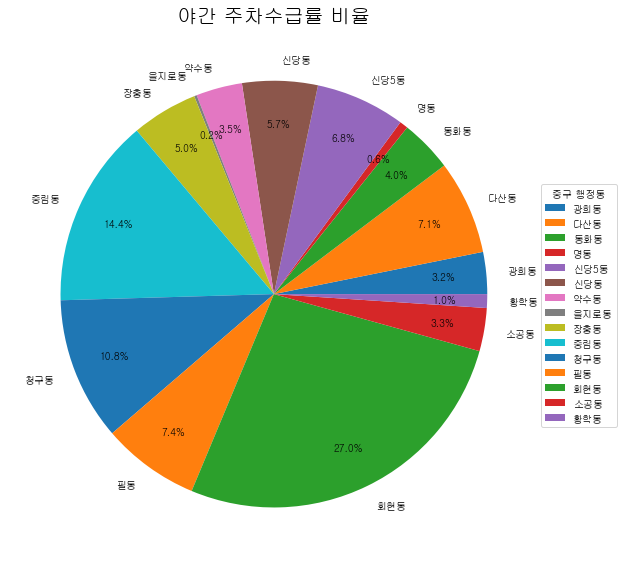

In [65]:
plt.figure(figsize = (13, 8))
plt.pie(df_final['df_night_percent']*100, labels  = dong_list, autopct = '%.1f%%', pctdistance = 0.8)
plt.title('야간 주차수급률 비율', size= 20)
plt.legend(dong_list, loc =(1, 0.25), title = '중구 행정동' )
plt.tight_layout()
plt.show()